# Unit 7: Demonstration Central Limit Theorem


In [31]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
# The scipy.stats package stats offers great support
# distributions and random numbers.
# see https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

from scipy.stats import norm 

In [3]:
#########################################################################
# SUPPORTING FUNCTIONS ARE DEFINED HERE - DO NOT CHANGE
#########################################################################
def summary(y,**kwargs):
    """Prints summary statistics of the data (random variables)
    
    Input parameter: 
        y (1-d numpy array) : array with sample data
    Returns:
        a tuple with mean, standard deviation, minimum, maximum 
    """
    # end of function's docstring (shows up when typing help(summary))
    
    # Note the print function uses inside the strings the placeholder %12.4f for 
    # formatting the list (Python type 'tuple') of numbers such as mean and stddev
    # they are printed where %12.4f shows up in the string #########.####
    
    print(40*"-")
    print('Summary statistics for the data:')
    if np.NAN in y:
        n=np.size(y)
        nmiss=np.sum(np.isnan(y))  
        nsample=n-nmiss
        print('Array size='+str(n))   
        print('Detected NAN (missing values) in array :'+str(nmiss))
        print('Sample size:'+str(nsample))
        m=np.nanmean(y)
        s=np.nanstd(y)
        mn=np.nanmin(y)
        mx=np.nanmax(y)
    else:
        nsample=np.size(y)
        print ('Sample size='+str(nsample))
        m=np.mean(y)
        s=np.std(y)
        mn=np.min(y)
        mx=np.max(y)
    print ('mean   : %12.4f' % (m))
    print ('stddev : %12.4f' % (s))  
    print ('mininum: %12.4f' % (mn))
    print ('maximum: %12.4f' % (mx))
    return m,s,mn,mx

<P style="background-color:purple;color:gold;font-size:133%">
<BR>
 Main code section (users should only make changes in code below)
<BR>
<BR>
</P>

In [4]:
# **********************************************************
# User control parameters
# **********************************************************
isCheck=True
nsample=1000 # size of the array with random values



### Numpy provides functions that can generate random numbers

#### Example:

*np.random.uniform(size=10)* 

This creates a numpy array with 10 random numbers
in range of 0-1.



In [6]:
# Independent and identically uniformly distributed random numbers
x1=np.random.uniform(size=nsample)

if isCheck:
    print()
    print()
    print('Just checking: what is x1?')
    print('\tObject type: ', type(x1))
    print('\tSize : ' + str(np.size(x1)))
    print('\t1-dim array with '+str(nsample)+' numbers')
    print()
    print()

m,s,mn,mx=summary(x1)



Just checking: what is x1?
	Object type:  <class 'numpy.ndarray'>
	Size : 1000
	1-dim array with 1000 numbers


----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       0.4989
stddev :       0.2919
mininum:       0.0000
maximum:       0.9995


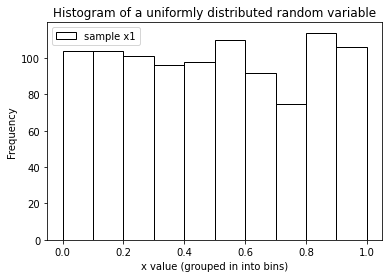

In [14]:
plt.hist(x1,bins=10,edgecolor='black',label='sample x1',lw=1,fill=False)
plt.legend()
plt.title("Histogram of a uniformly distributed random variable")
plt.xlabel("x value (grouped in into bins)")
plt.ylabel("Frequency")
plt.show()

In [15]:
# **********************************************************
# Now we create two uniformly distributed random variables
# **********************************************************

# two independent and identically distributed random number sets
x1=np.random.uniform(size=nsample)
x2=np.random.uniform(size=nsample)

m1,s1,mn1,mx1=summary(x1)
m2,s2,mn2,mx2=summary(x2)


----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       0.4873
stddev :       0.2893
mininum:       0.0038
maximum:       0.9979
----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       0.5127
stddev :       0.2983
mininum:       0.0003
maximum:       0.9996


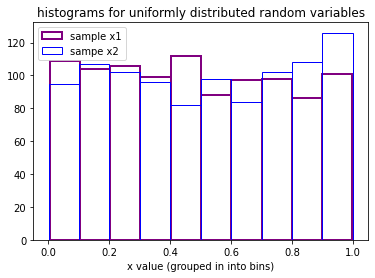

In [18]:
nbin=10 # number of bins 
plt.hist(x1,bins=nbin,edgecolor='purple',label='sample x1',lw=2,fill=False)
plt.hist(x2,bins=nbin,edgecolor='blue',label='sampe x2',lw=1,fill=False)
plt.title("histograms for uniformly distributed random variables")
plt.xlabel("x value (grouped in into bins)")
plt.legend()
plt.show()


In [ ]:
# summation of two independent and identically distributed random number sets
x1=np.random.uniform(size=nsample)
x2=np.random.uniform(size=nsample)

m1,s1,mn1,mx1=summary(x1)
m2,s2,mn2,mx2=summary(x2)

y=(x1+x2)
print()
print ("The sum of the two uniformly distributed random variables:")
ym,ys,ymn,ymx=summary(y)

In [ ]:
plt.hist(y,bins=10,color='cyan',edgecolor='black',label='y=x1+x2',lw=1,fill=True,alpha=0.5)
plt.hist(x1,bins=10,edgecolor='purple',label='x1',lw=2,fill=False)
plt.hist(x2,bins=10,edgecolor='blue',label='x2',lw=1,fill=False)
plt.legend()
plt.show()

----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       0.9789
stddev :       0.4086
mininum:       0.0411
maximum:       1.9419


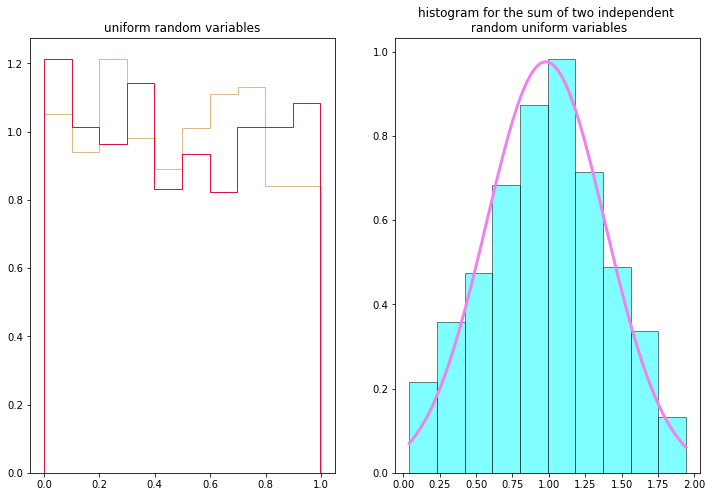

In [39]:
# figure with two histograms side by side
# sharing the same y-axis range is set off    
x1=np.random.uniform(size=nsample)
x2=np.random.uniform(size=nsample)
y=(x1+x2)


nbin=10 # controls how many bins (bars) the histgram uses
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False,figsize=(12,8))
# left figure
ax[0].hist(x1,bins=nbin,color='burlywood',density=True,histtype='step',label='x1')
ax[0].hist(x2,bins=nbin,color='crimson',density=True,histtype='step',label='x2')
ax[0].set_title('uniform random variables')
# right figure
ax[1].hist(y,bins=nbin,color='cyan',edgecolor='black',
           label='average (y=x1+x2)',density=True,alpha=0.5)
ax[1].set_title('histogram for the sum of two independent \n random uniform variables')


# last compare with the 'best fitted gaussian PDF'
# location parameter is the mean of y and scale parameter is the 
# standard deviation of y

ym,ys,ymn,ymx=summary(y)

###################################################################
# create x-values for the gaussian function plot
###################################################################
xhelp=np.linspace(ymn,ymx,num=100)
gaussian=norm.pdf(xhelp,ym,ys)

ax[1].plot(xhelp,gaussian,color='violet',linewidth=3)

fig.show()

<P style="background-color:purple;color:gold;font-size:133%">
<BR>
 Task 1: Observe what happens if you sum over more than two independent uniformly distributed random variables. 
<BR>
<BR>
</P>


### NOTE
In the text we talk about the __number__ of summation terms (e.g. in y=x1+x2+x3 the number is 3), not to be confused with the sample size. The __sample size__ is the amount of data values we generate for the random variables. The sample size is the amount of data values we generate for the random variables that we use in the summation. 

### (a) Write code that allows you to sum over 3, 4, 5, and 6 uniformly distributed random variables.

In [ ]:
# your code

### (b) Adjust sample size and bin numbers to optimize the analysis 

- Increasing sample size: want to see a less noisy shape of the resulting distribution shown in the histograms. 
- Observe closely how the shape of the distribution of the summation variable (cyan colors) changes when the number of random uniform variables that we sum up (x1+x2+x3+ ... ) is increased. 

#### Note: Keep the sample size _nsample_ smaller than 100,000!

In [ ]:
# your code

<P style="background-color:purple;color:gold;font-size:133%">
<BR>
 Task 3: Compare the distribution of the summation values with the normal distribution curve. How good does the curve fit the data. In particular, take a look at the tails of the distribution.
<BR>
<BR>
</P>

### Summarize your observations and discuss the following question: How many uniformly distributed random variables do you have to sum so that the sum (a random variable) is normally distributed.

<P style="background-color:purple;color:gold;font-size:133%">
<BR>
Task 3 (optional): Develop code with help of a loop structure that allows you to take the sum over a user defined number of uniformly distributed random variables. 
<BR>
<BR>
 
   



---
#### Optional: For students who like to work with Pandas DataFrame objects and methods
---

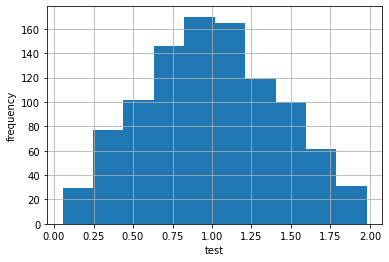

In [38]:
df=pd.DataFrame() # empty data frame
df['x1']=x1
df['x2']=x2
y=df.sum(axis=1)
df['x1+x2']=y
df
fig=plt.figure(figsize=[6,4])
ax=df['x1+x2'].hist()
ax.set_xlabel('test')
ax.set_ylabel('frequency')
plt.show()

### References:

 - Continous random variables, distributions, Normal distribution: Collaborative Statistics Ebook Ch. 5,6
 - Central Limit Theorem: Collaborative Statistics Ebook Ch. 7
 - Histogram [plot customization] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
 - Info to the package [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) 